# Assignment 3: Decision Tree and Random Forest {-}

This assignment aims at familiarizing you with training and testing Decision Tree and Random Forest classification model. Here are the BASIC requirements of the assignment:

- Load the data.
- Analyze the data.
- Check if the data is imbalanced, possibly apply SMOTE to oversample or undersample data classes.
- Use GridSearchCV to find the best Decision Tree and Random Forest.
- Show the most important features.
- Visualize the tree.


The dataset you will be working on is 'data-employee-recruitment.csv'. It is composed of attributes such as employee gender, education level, company size, etc., to develop an employee recruitment prediction model.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment3-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment3 (e.g., ML4DS-2012345-Assigment3) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have data exploration and modeling steps other than the basic requirements. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [ ]:
!pip install imblearn

In [ ]:
!pip install graphviz

In [ ]:
# Load Pandas library and load the dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import graphviz
# from pandas_profiling import ProfileReport
data = pd.read_csv("data-employee-recruitment.csv")

In [ ]:
data.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,14569,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,10557,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,14095,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,16300,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,14550,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0


A company is looking for potential candidates from a pool of training program attendants. The dataset contains attendant background (demographics, current company, i.e., data features) and whether he or she is looing for a job change (data label). The company wants to build a prediction model using this dataset. Here follows the data dictionary:

* enrollee_id : unique ID for candidate
* city_development_index : developement index of the city (scaled)
* gender: gender of candidate
* relevent_experience: relevant experience of candidate
* enrolled_university: type of university course enrolled if any
* education_level: education level of candidate
* major_discipline: education major discipline of candidate
* experience: candidate's total experience in years
* company_size: number of employees in the current company of candidate
* company_type : Type of current employer
* last_new_job: difference in years between previous job and current job
* training_hours: training hours completed
* target value: 0 – not looking for job change, 1 – looking for a job change

In [ ]:
# Your code goes here
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,2135.000000,2135.000000,2135.000000,2135.000000
mean,18059.164403,0.756329,65.296956,0.515222
std,9474.072705,0.145332,63.639919,0.499885
min,13.000000,0.450000,-5.000000,0.000000
25%,10631.000000,0.624000,22.000000,0.000000
50%,18450.000000,0.743000,45.000000,1.000000
75%,26543.500000,0.910000,87.500000,1.000000
max,33349.000000,1.026000,336.000000,1.000000


In [ ]:
data.shape

(2135, 13)

In [ ]:
data.copy()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,14569,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,10557,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,14095,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,16300,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,14550,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,33060,0.698,Female,No relevent experience,Part time course,Graduate,Other,3,10/49,Funded Startup,1,14,0.0
2131,28729,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,10000+,NGO,1,94,0.0
2132,11669,0.926,Male,Has relevent experience,Full time course,Masters,STEM,19,50-99,Pvt Ltd,4,27,0.0
2133,32932,0.895,Male,Has relevent experience,Part time course,Masters,Other,>20,1000-4999,Pvt Ltd,>4,18,0.0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 60 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   city_development_index                       2135 non-null   float64
 1   training_hours                               2135 non-null   int64  
 2   target                                       2135 non-null   float64
 3   gender_Female                                2135 non-null   uint8  
 4   gender_Male                                  2135 non-null   uint8  
 5   relevent_experience_Has relevent experience  2135 non-null   uint8  
 6   relevent_experience_No relevent experience   2135 non-null   uint8  
 7   enrolled_university_Full time course         2135 non-null   uint8  
 8   enrolled_university_Part time course         2135 non-null   uint8  
 9   education_level_Graduate                     2135 non-null   uint8  
 10  

In [43]:
data.isnull()

,city_development_index,training_hours,target,gender_Female,gender_Male,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,education_level_Graduate,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2133,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
# data.drop(columns=['enrollee_id'], inplace=True)

In [45]:
data = pd.get_dummies(data)

In [46]:
data.tail()

,city_development_index,training_hours,target,gender_Female,gender_Male,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,education_level_Graduate,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
2130,0.698,14,0.0,1,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2131,0.920,94,0.0,0,1,0,1,1,0,1,...,1,0,0,0,1,0,0,0,0,0
2132,0.926,27,0.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2133,0.895,18,0.0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2134,0.624,52,1.0,0,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0


In [47]:
X = data.drop(columns=['target'])
y = data.target

In [48]:
# Load libraries
from sklearn.model_selection import train_test_split, GridSearchCV

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=1, test_size=0.2)

In [49]:
#Before oversampling
print("Befor oversampling: " + str(X_train.shape))
print(np.unique(y_train, return_counts=True))

Befor oversampling: (1708, 59)
(array([0., 1.]), array([836, 872]))


In [50]:
# Apply oversampling method for label '1' (SMOTE will generate samples having label '1' such that the number of samples is equal to label 'y' in the training set).
# Imbalanced-learn (imported as imblearn) provides tools when dealing with classification with imbalanced classes.
# Reference: https://imbalanced-learn.org/
from imblearn.over_sampling import SMOTE     # Load the SMOTE library
smote = SMOTE(random_state=5)                # Initialize SMOTE
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train, y_train)     # Oversample label '1' (minority class) in the training set

In [51]:
# Before oversampling
print("Before oversampling: " + str(X_train.shape))
print(np.unique(y_train, return_counts=True))                  # Print number of labels, label '0' dominates '1'

# After oversampling
print("After oversampling: " + str(X_train_oversampling.shape))
print(np.unique(y_train_oversampling, return_counts=True))     # Print number of labels, now label '0' and '1' have the same number of labels.

Before oversampling: (1708, 59)
(array([0., 1.]), array([836, 872]))
After oversampling: (1744, 59)
(array([0., 1.]), array([872, 872]))


In [52]:
# Import GridSearchCV for finding the best hyper-parameter set.
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [3, 5],                           # Maximum depth of the tree
         "min_samples_split": [4, 8]}                   # Stop splitting condition.

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5)

In [53]:
# Run the search on oversampled training data samples.
grid_search.fit(X_train_oversampling, y_train_oversampling)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'min_samples_split': [4, 8]})

In [54]:
# Best set of hyper-parameters found after searching
best_params_dt = grid_search.best_params_

In [55]:
# Build a decision tree model pipeline from the best set of hyper-parameters found
model_dt = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])

In [56]:
# Train the decision tree model
model_dt.fit(X_train_oversampling, y_train_oversampling)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=8)

In [58]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_dt.predict(X_test)

print(classification_report(y_test, pred_y))

# Note 1: macro avg = (precision_0 + precision_1) / 2
# Note 2: weighted avg = (support_0 * precision_0 + support_1 * precision_1) / number_of_samples

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83       199
         1.0       0.84      0.86      0.85       228

    accuracy                           0.84       427
   macro avg       0.84      0.84      0.84       427
weighted avg       0.84      0.84      0.84       427



In [59]:
# Building a RandomForest is similar to building a decision tree, but there is an additional hyper-parameter called n_estimators which is the number of trees in the forest.
from sklearn.ensemble import RandomForestClassifier

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [7, 9, 11],                           # Maximum depth of the tree
         "min_samples_split": [8, 12, 16]}                   # Stop splitting condition.

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=10, n_jobs=10), param_grid=params, cv= 5) # Number of trees in the forest is 10

# Run the search on oversampled training data samples.
grid_search_rf.fit(X_train_oversampling, y_train_oversampling)     # Train the RandomForest

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10, n_jobs=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11],
                         'min_samples_split': [8, 12, 16]})

In [60]:
# Best set of hyper parameters of the Random Forest
grid_search_rf.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 8}

In [61]:
# Build a Random Forest model pipeline from the best set of hyper-parameters found
model_rf = RandomForestClassifier(n_estimators=10, random_state=1, criterion=grid_search_rf.best_params_['criterion'], max_depth=grid_search_rf.best_params_['max_depth'], min_samples_split=grid_search_rf.best_params_['min_samples_split'])     # Initialize the RandomForest

In [62]:
# Train the Random Forest model
model_rf.fit(X_train_oversampling, y_train_oversampling)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_split=8,
                       n_estimators=10, random_state=1)

In [63]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_rf.predict(X_test)

print(classification_report(y_test, pred_y))

# Note: theoretically saying, there is no guarantee that the Random Forest is alsways better than the Decision Tree, i.e., the model ensembling is not always better than a single model in general.

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       199
         1.0       0.86      0.86      0.86       228

    accuracy                           0.85       427
   macro avg       0.85      0.85      0.85       427
weighted avg       0.85      0.85      0.85       427



city_development_index                         0.833736
training_hours                                 0.016168
gender_Female                                  0.000000
gender_Male                                    0.000000
relevent_experience_Has relevent experience    0.000000
relevent_experience_No relevent experience     0.000000
enrolled_university_Full time course           0.000000
enrolled_university_Part time course           0.009457
education_level_Graduate                       0.000000
education_level_Masters                        0.000000
education_level_Phd                            0.000000
major_discipline_Arts                          0.000000
major_discipline_Business Degree               0.000000
major_discipline_Humanities                    0.000000
major_discipline_No Major                      0.000000
major_discipline_Other                         0.000000
major_discipline_STEM                          0.000000
experience_1                                   0

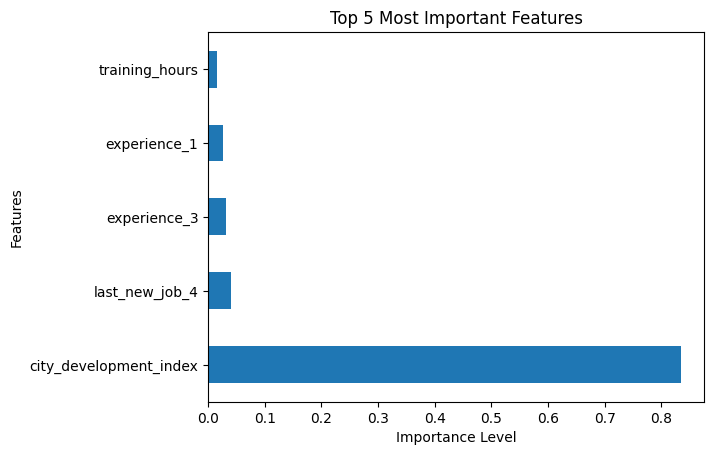

In [64]:
# Print the importance level of each feature
weights = model_dt.feature_importances_     # Feature importance scores.
cols = X.columns                            # Corresponding names of important features.
feature_importances = pd.Series(weights, index=cols)     # Generate Series containing importance level
print(feature_importances)

# Plot the five most important features
feature_importances.nlargest(5).plot(kind="barh")
plt.title('Top 5 Most Important Features')
plt.xlabel('Importance Level')
plt.ylabel('Features')
plt.show()


In [65]:
# Visualize the tree. Note: to run dot command, we have to install 'graphviz'
from sklearn import tree
tree.export_graphviz(decision_tree=model_dt, out_file='classification-tree.dot', feature_names=X.columns)     # Save model as 'classification-tree.dot'
from subprocess import call
call(['dot', '-Tpng', 'classification-tree.dot', '-o', 'classification-tree.png', '-Gdpi=300'])        # Convert the model to an image

0

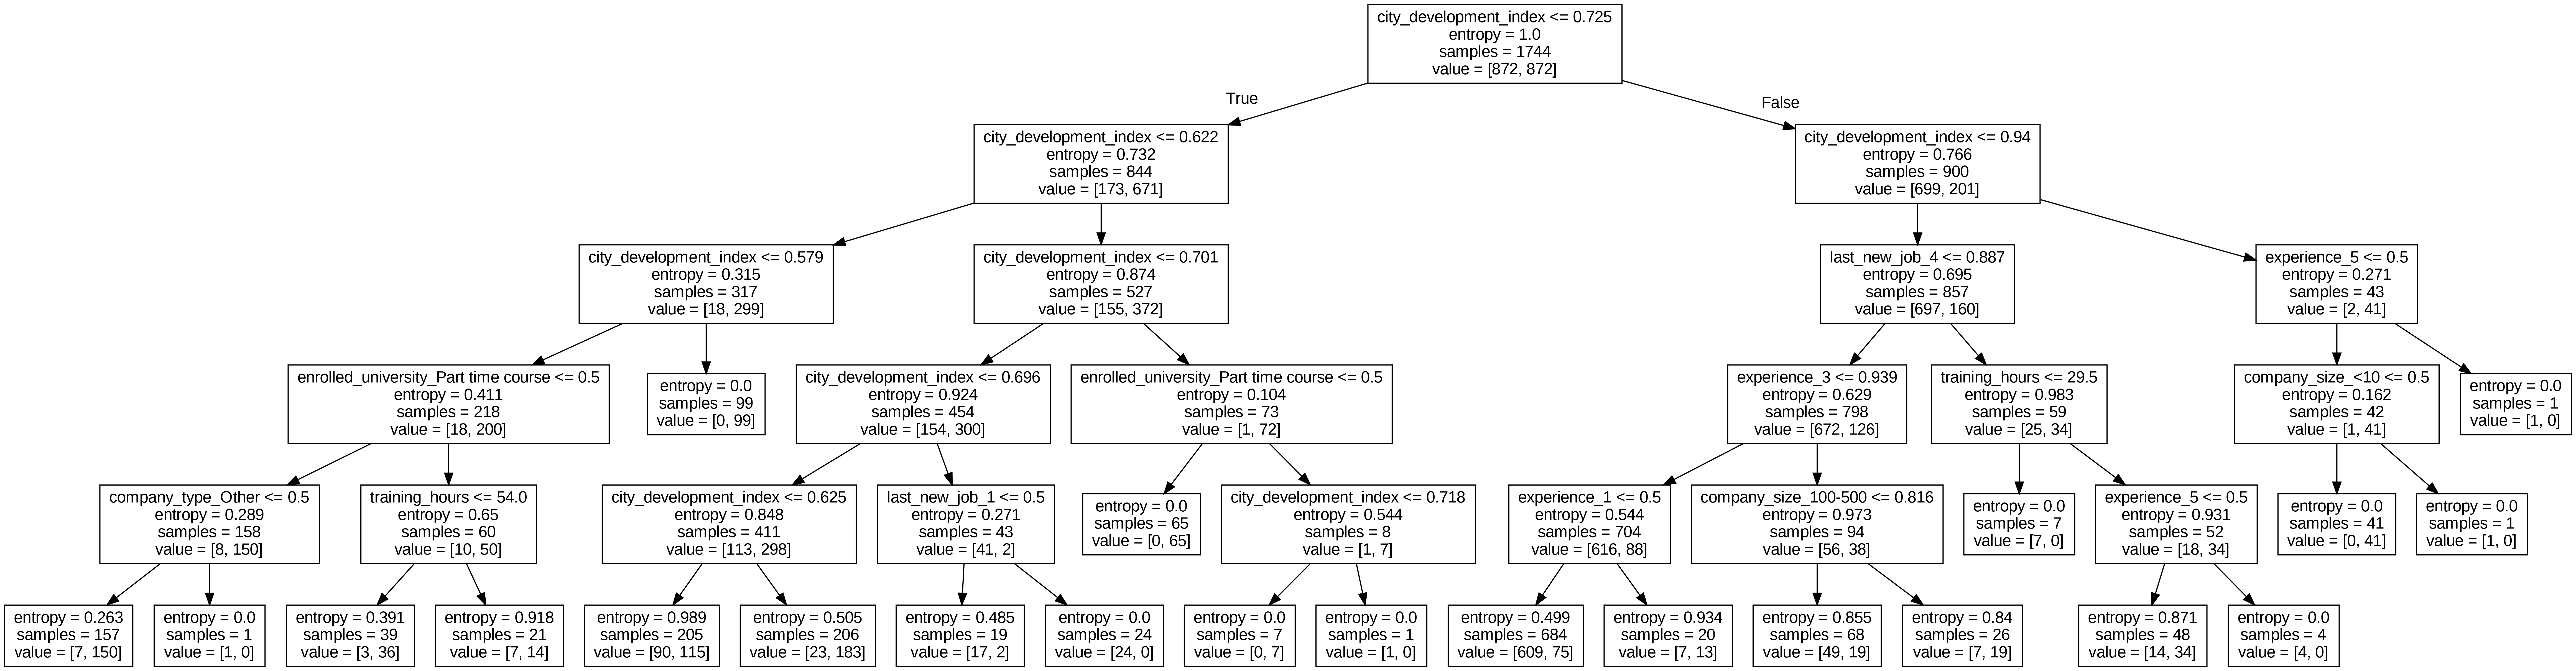

In [66]:
from IPython.display import Image
Image(filename = 'classification-tree.png')     # Load and display file 'classification-tree.png'

Regression Tree model


In [72]:
# Initialize regression tree model
model_dt_reg = tree.DecisionTreeRegressor(criterion='squared_error', max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])
model_dt_reg.fit(X_train_oversampling, y_train_oversampling)

DecisionTreeRegressor(max_depth=5, min_samples_split=8)

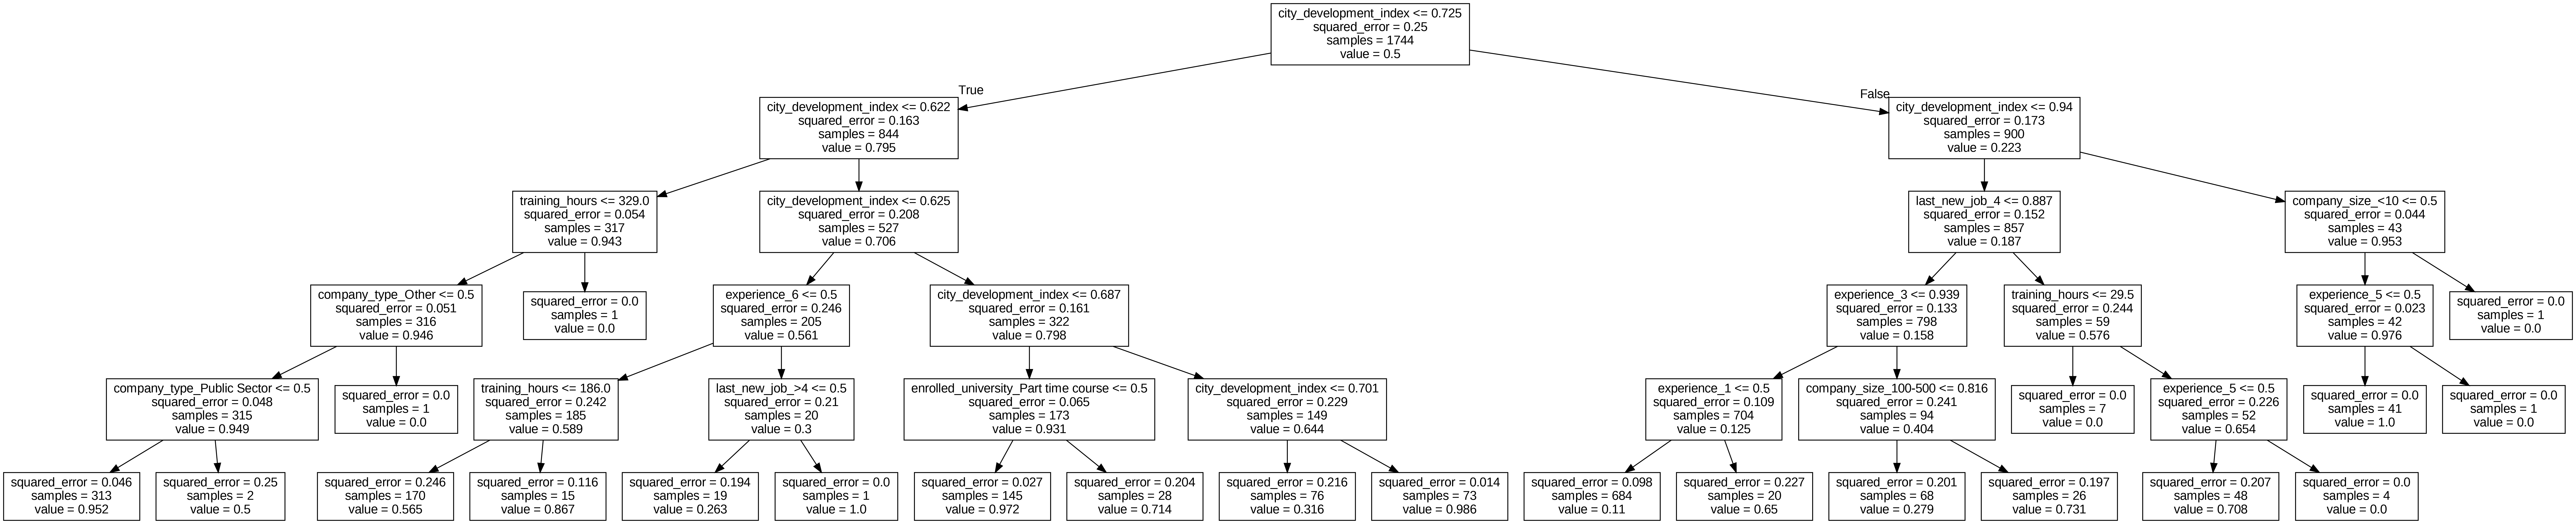

In [73]:
# Visualize the regression tree model
dot_data = tree.export_graphviz(decision_tree=model_dt_reg, out_file='regression-tree.dot', feature_names=X.columns)     # Save model as 'regression-tree.dot'
call(['dot', '-Tpng', 'regression-tree.dot', '-o', 'regression-tree.png', '-Gdpi=300'])         # Convert the model to an image

Image(filename = 'regression-tree.png')     # Load and display file 'regression-tree.png'

ENTRPPY feature important

In [74]:
from sklearn.tree import DecisionTreeClassifier
model_fi_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=10)
model_fi_entropy.fit(X_train_oversampling, y_train_oversampling)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=10)

In [75]:
# Visualize the tree. Note: to run dot command, we have to install 'graphviz'
from sklearn import tree
tree.export_graphviz(decision_tree=model_fi_entropy, out_file='classification-tree-entropy.dot', feature_names=X.columns)     # Save model as 'classification-tree-entropy.dot'
from subprocess import call
call(['dot', '-Tpng', 'classification-tree-entropy.dot', '-o', 'classification-tree-entropy.png', '-Gdpi=300'])        # Convert the model to an image

0

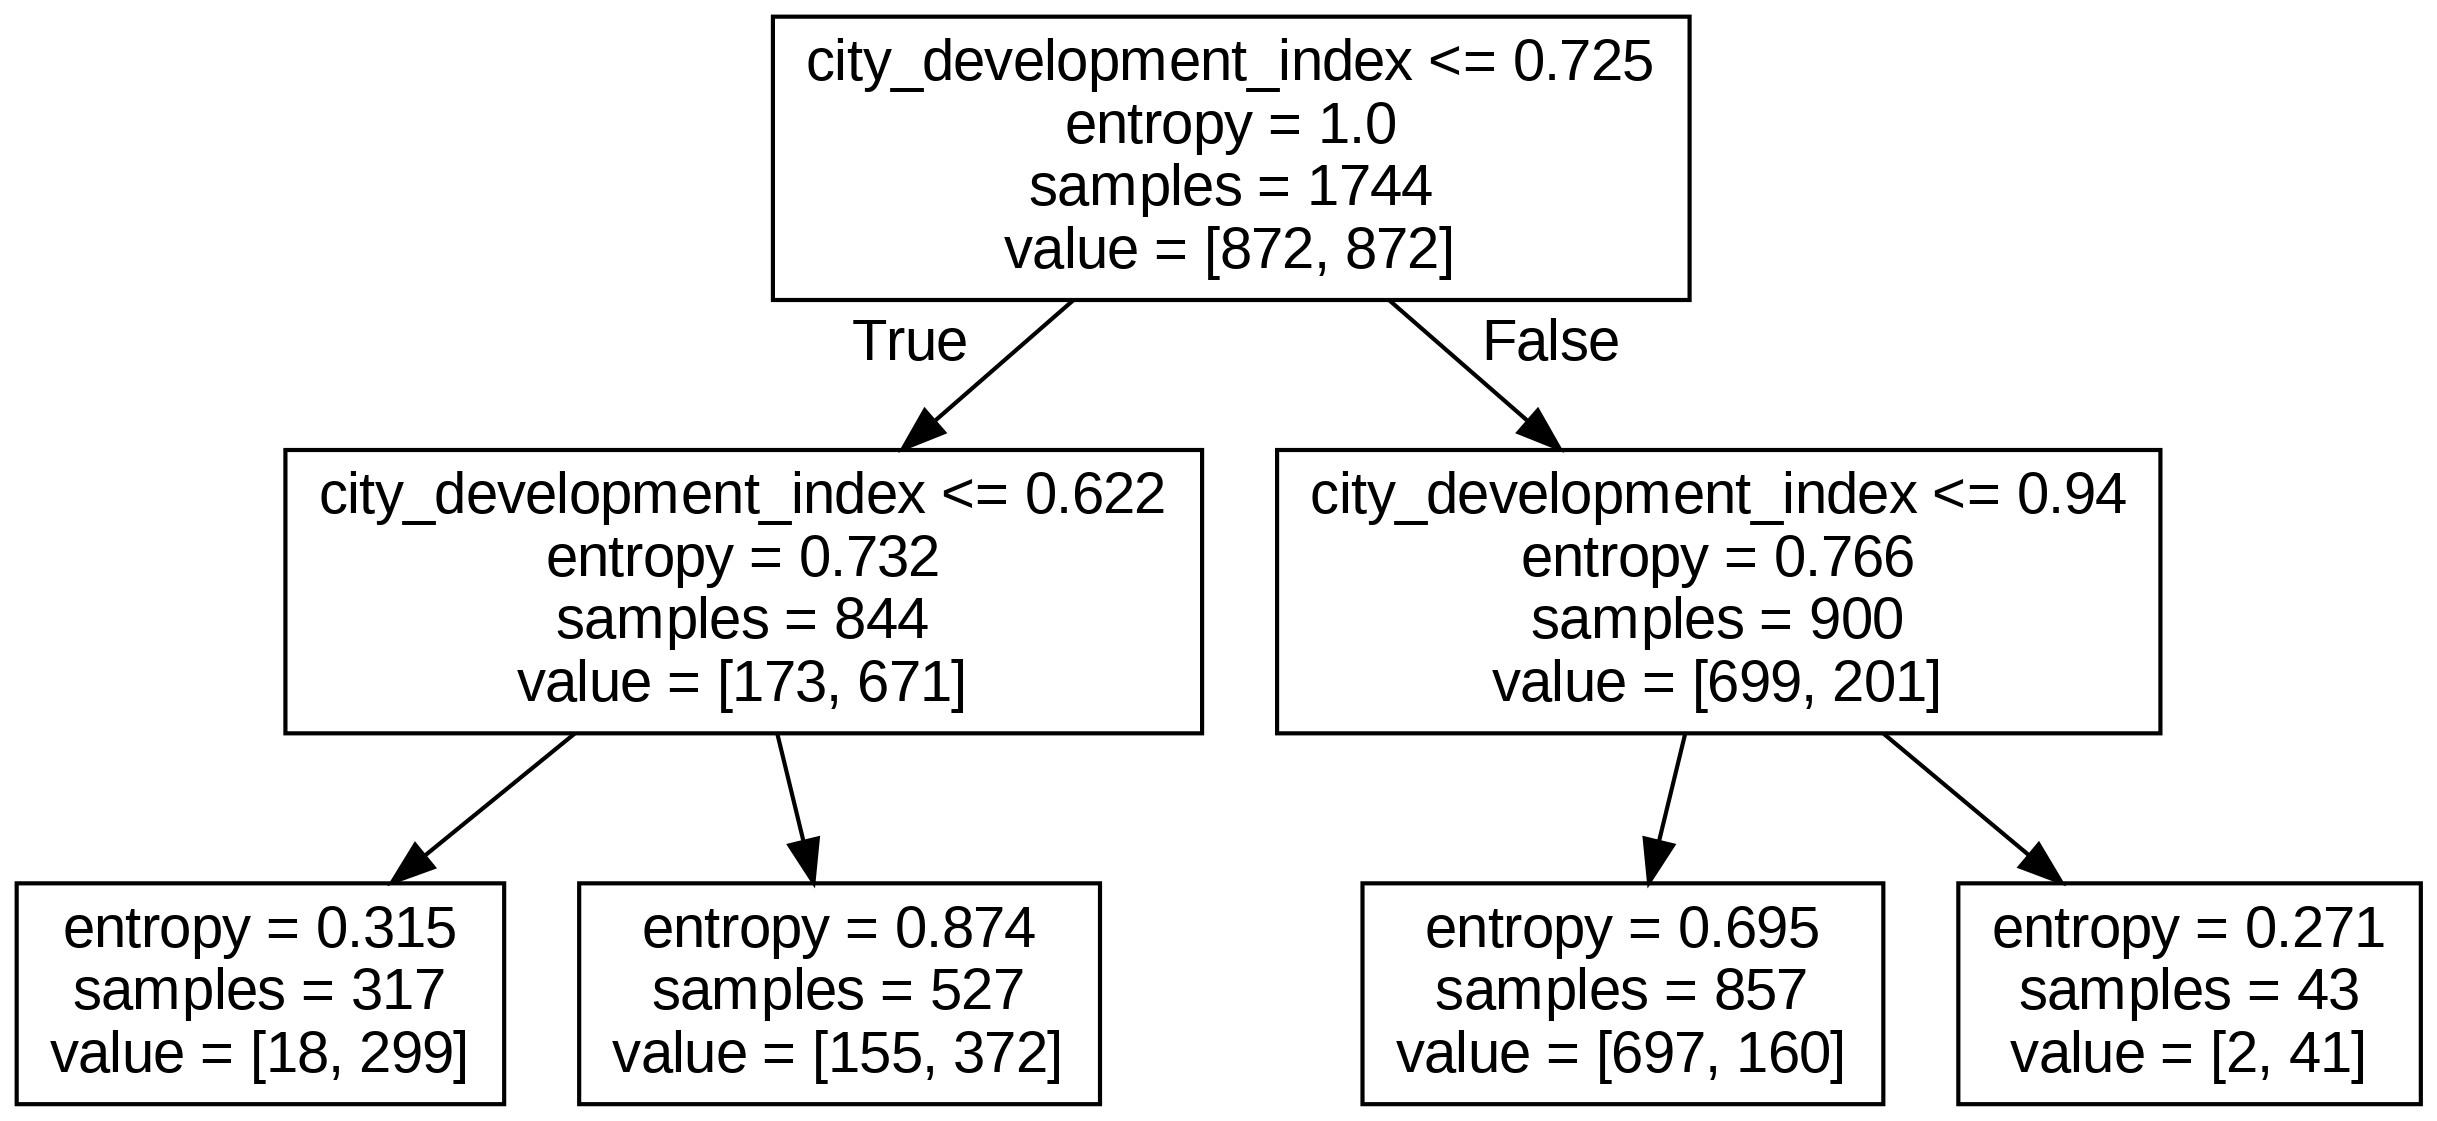

In [76]:
from IPython.display import Image
Image(filename = 'classification-tree-entropy.png')     # Load and display file 'classification-tree.png'

city_development_index                         1.0
training_hours                                 0.0
gender_Female                                  0.0
gender_Male                                    0.0
relevent_experience_Has relevent experience    0.0
relevent_experience_No relevent experience     0.0
enrolled_university_Full time course           0.0
enrolled_university_Part time course           0.0
education_level_Graduate                       0.0
education_level_Masters                        0.0
education_level_Phd                            0.0
major_discipline_Arts                          0.0
major_discipline_Business Degree               0.0
major_discipline_Humanities                    0.0
major_discipline_No Major                      0.0
major_discipline_Other                         0.0
major_discipline_STEM                          0.0
experience_1                                   0.0
experience_10                                  0.0
experience_11                  

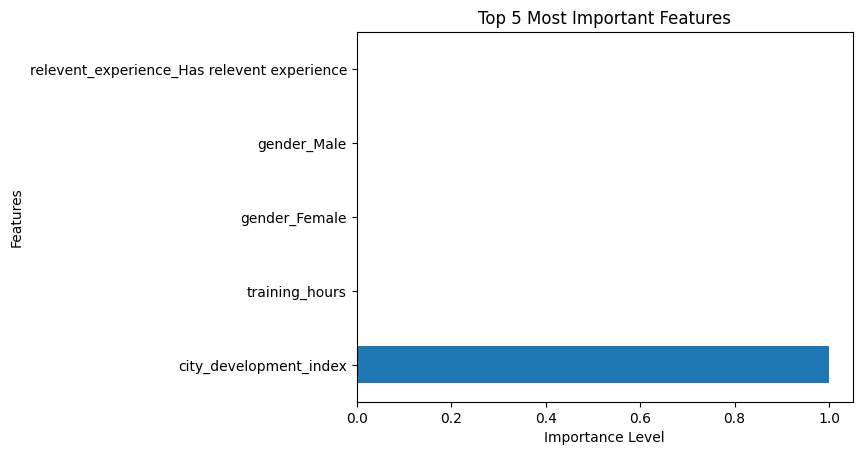

In [78]:
# Print the importance level of each feature
weights_entropy = model_fi_entropy.feature_importances_     # Feature importance scores.
cols = X.columns                                            # Corresponding names of important features.
feature_importances_entropy = pd.Series(weights_entropy, index=cols)     # Generate Series containing importance level
print(feature_importances_entropy)

# Plot the five most important features
feature_importances_entropy.nlargest(5).plot(kind="barh")
plt.title('Top 5 Most Important Features')
plt.xlabel('Importance Level')
plt.ylabel('Features')
plt.show()

Feature importance

In [79]:
# Build a classification tree based on Entropy
from sklearn.tree import DecisionTreeClassifier
model_fi_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=10)
model_fi_gini.fit(X_train_oversampling, y_train_oversampling)

DecisionTreeClassifier(max_depth=2, min_samples_split=10)

In [80]:
# Visualize the tree. Note: to run dot command, we have to install 'graphviz'
from sklearn import tree
tree.export_graphviz(decision_tree=model_fi_gini, out_file='classification-tree-gini.dot', feature_names=X.columns)     # Save model as 'classification-tree-gini.dot'
from subprocess import call
call(['dot', '-Tpng', 'classification-tree-gini.dot', '-o', 'classification-tree-gini.png', '-Gdpi=300'])        # Convert the model to an image

0

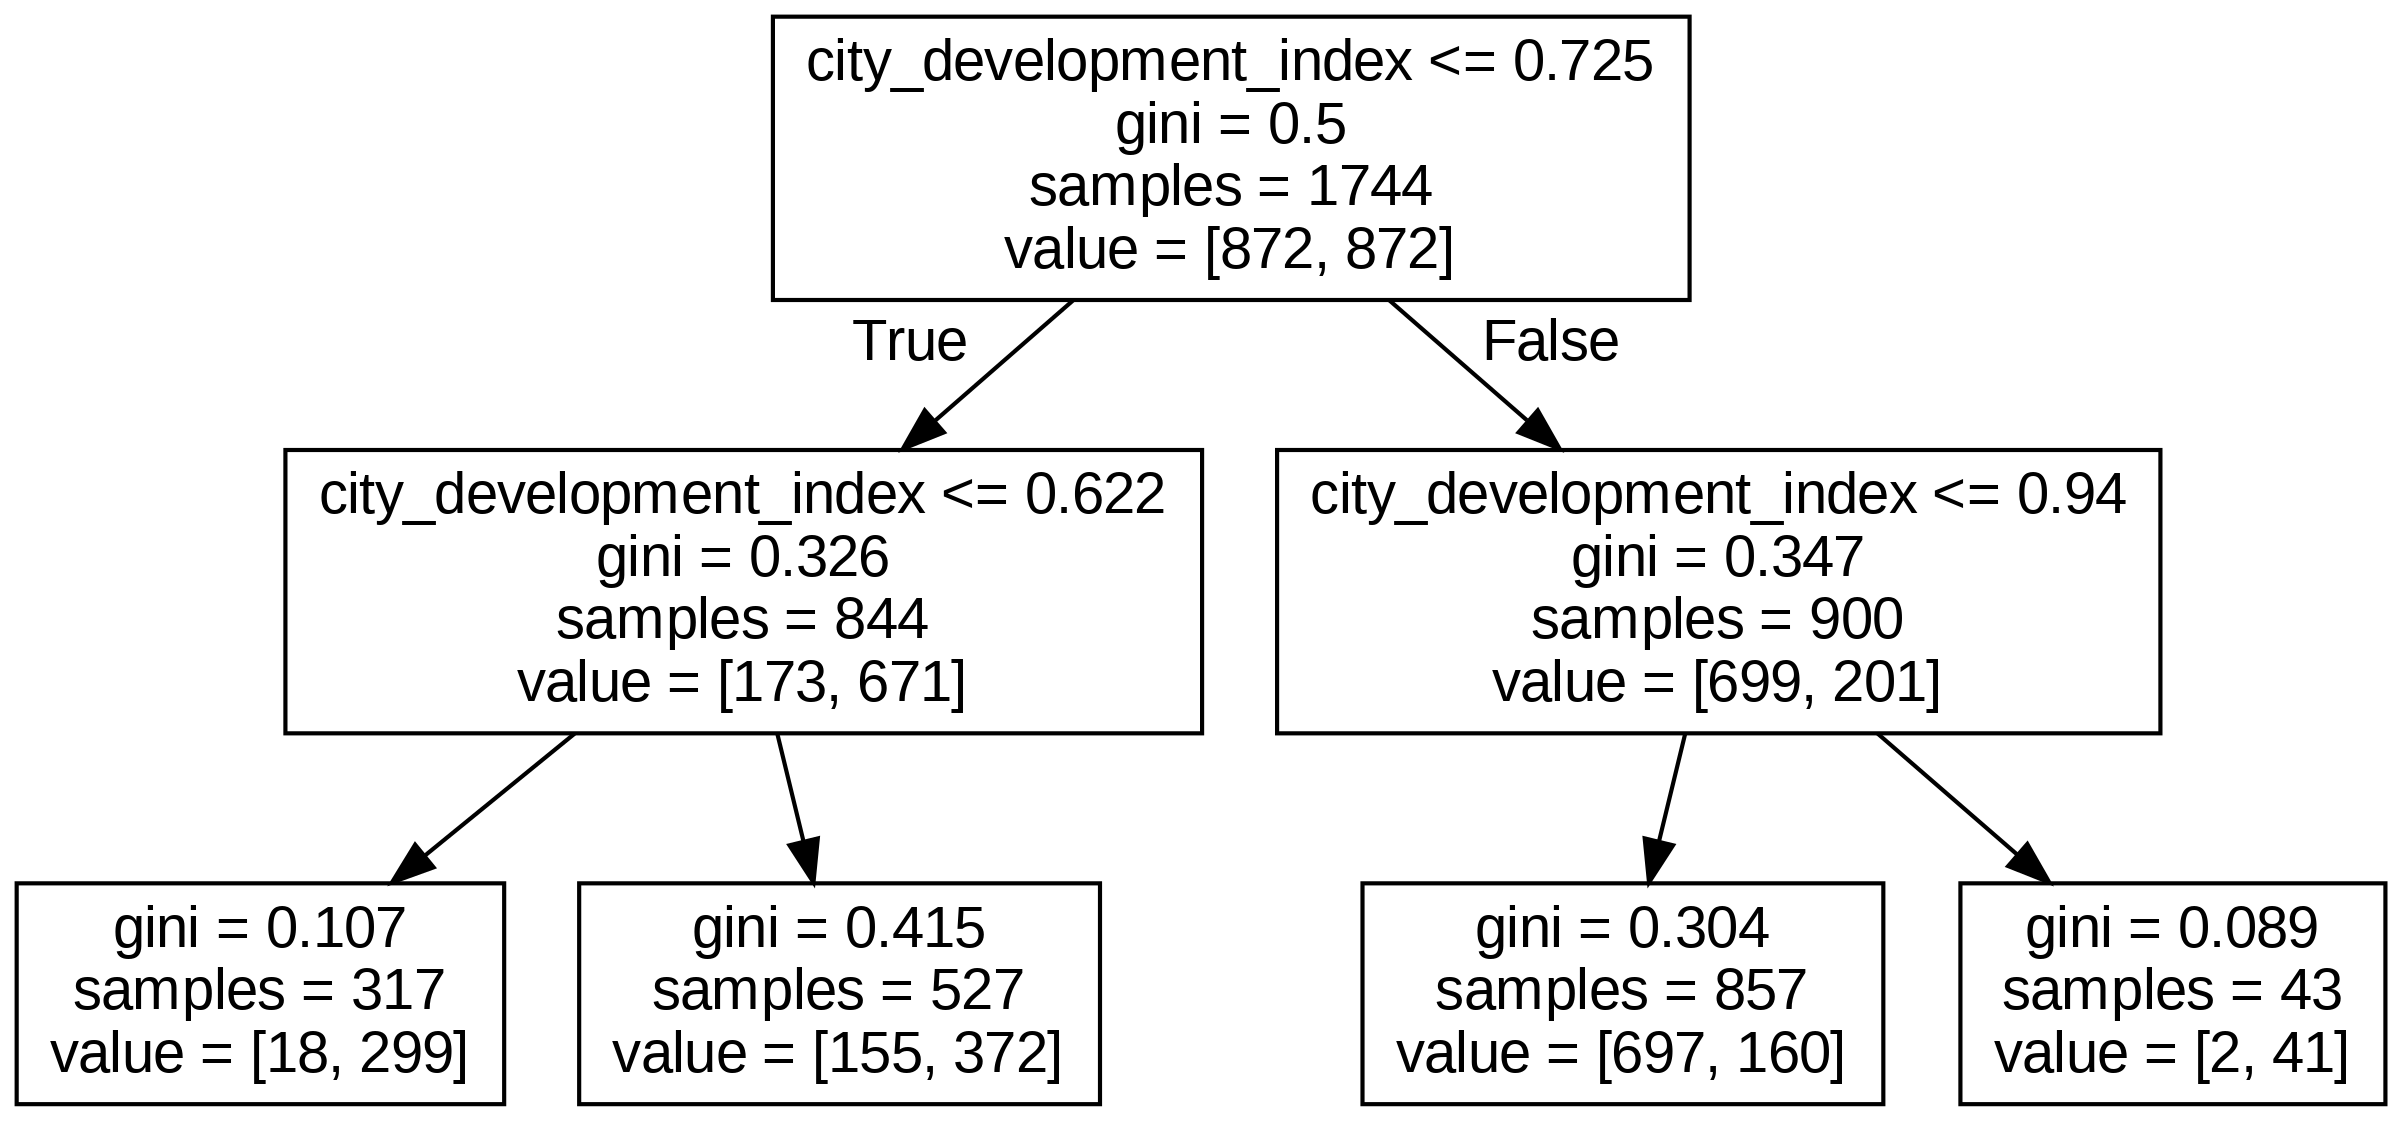

In [81]:
from IPython.display import Image
Image(filename = 'classification-tree-gini.png')     # Load and display file 'classification-tree-gini.png'

city_development_index                         1.0
training_hours                                 0.0
gender_Female                                  0.0
gender_Male                                    0.0
relevent_experience_Has relevent experience    0.0
relevent_experience_No relevent experience     0.0
enrolled_university_Full time course           0.0
enrolled_university_Part time course           0.0
education_level_Graduate                       0.0
education_level_Masters                        0.0
education_level_Phd                            0.0
major_discipline_Arts                          0.0
major_discipline_Business Degree               0.0
major_discipline_Humanities                    0.0
major_discipline_No Major                      0.0
major_discipline_Other                         0.0
major_discipline_STEM                          0.0
experience_1                                   0.0
experience_10                                  0.0
experience_11                  

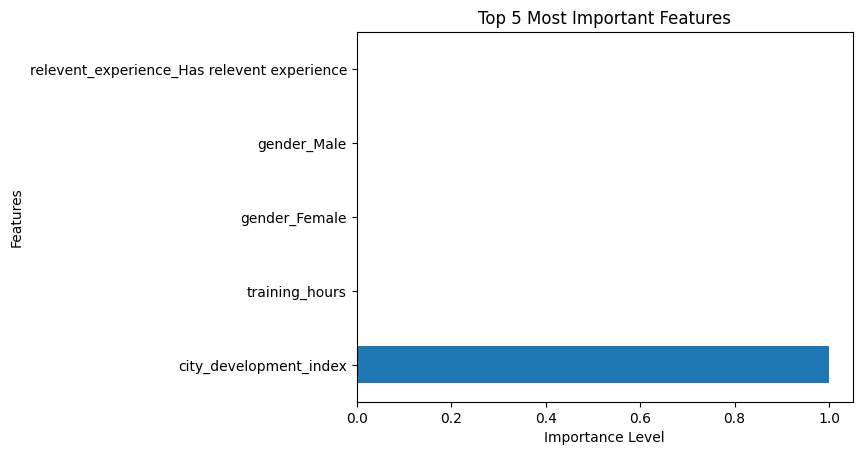

In [83]:
# Print the importance level of each feature
weights_gini = model_fi_gini.feature_importances_           # Feature importance scores.
cols = X.columns                                            # Corresponding names of important features.
feature_importances_gini = pd.Series(weights_gini, index=cols)   # Generate Series containing importance level
print(feature_importances_gini)

# Plot the five most important features
feature_importances_gini.nlargest(5).plot(kind="barh")
plt.title('Top 5 Most Important Features')
plt.xlabel('Importance Level')
plt.ylabel('Features')
plt.show()